# Deal With Overfitting

In this session, we are going to deal with the model overfitting the datas.

Assume that here is a model to predict the price of the house : 

$$f_{\vec{w}, b} (\vec{x}) = w_1x + w_2x^2 + w_3x^3 + w_4x^4 + b$$

Then, we have such a dataset :

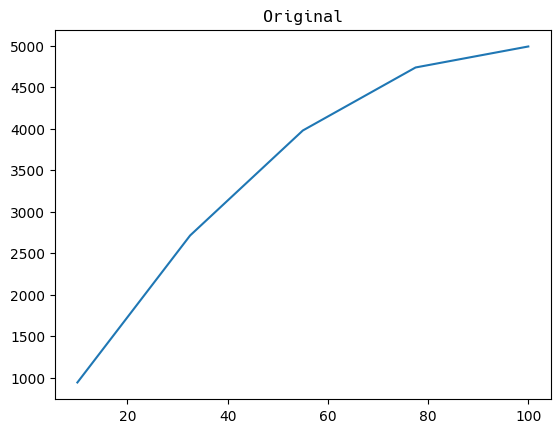

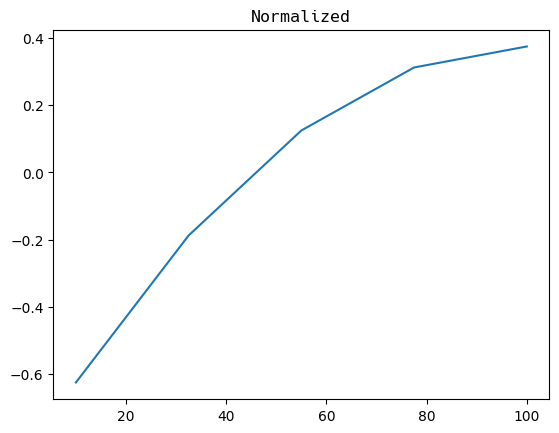

In [74]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace (10, 100, 5)
rand_array = np.random.rand (5,)
rand_array = (rand_array - np.mean (rand_array)) / (np.max (rand_array) - np.min (rand_array))
y = 100 * x - 0.5 * x ** 2 - 10
y_normal = (y - np.mean (y)) / (np.max (y) - np.min (y))

plt.plot (x, y)
plt.title ("Original", fontdict={"family": "Hack"})
plt.show ()

plt.plot (x, y_normal)
plt.title ("Normalized", fontdict={"family": "Hack"})
plt.show ()


In [50]:
def model_1 (x, w, b) : 
    return w[0] * x + w[1] * x**2 + w[2] * x**3 + w[3] * x**4 + b

def CostFunc (output, y) :
    f = np.sum (np.power (output - y, 2))
    f = f / (2 * len (output))
    return f

def Derivative_w (x, y, w, b) : 
    summary = np.sum ((model_1 (x, w, b) - y) * x)
    return summary / len (x)

def Derivative_b (x, y, w, b) :
    summary = np.sum (model_1 (x, w, b) - y)
    return summary / len (x)

def update (x, y, w, b, lr) :
    temp_w = w - lr * Derivative_w (x, y, w, b)
    temp_b = b - lr * Derivative_b (x, y, w, b)
    return temp_w, temp_b

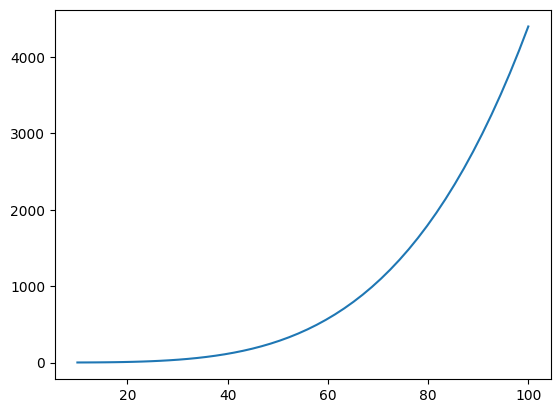

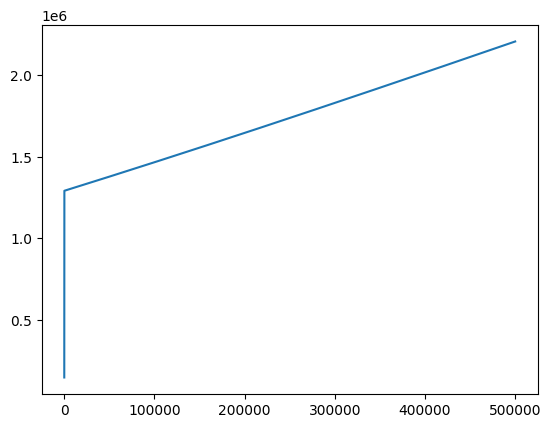

In [82]:
w = [0, 0, 0, 0]
b = 0
LR = 0.000001
EPOCHES = 500000

losses = []

for epoch in range (EPOCHES) :
    w, b = update (x, y_normal, w, b, LR)
    pred = model_1 (x, w, b)
    loss = CostFunc (pred, y_normal)
    losses.append (loss)

test_x = np.linspace (10, 100, 50)
pred_y = model_1 (test_x, w, b)
plt.plot (test_x, pred_y)
plt.show ()

plt.plot (range (EPOCHES), losses)
plt.show ()

In [60]:
def model_2 (x, w, b) : 
    return w[0] * x + w[1] * x**2 + b

def Derivative_w (x, y, w, b) : 
    summary = np.sum ((model_2 (x, w, b) - y) * x)
    return summary / len (x)

def Derivative_b (x, y, w, b) :
    summary = np.sum (model_2 (x, w, b) - y)
    return summary / len (x)

def update (x, y, w, b, lr) :
    temp_w = w - lr * Derivative_w (x, y, w, b)
    temp_b = b - lr * Derivative_b (x, y, w, b)
    return temp_w, temp_b

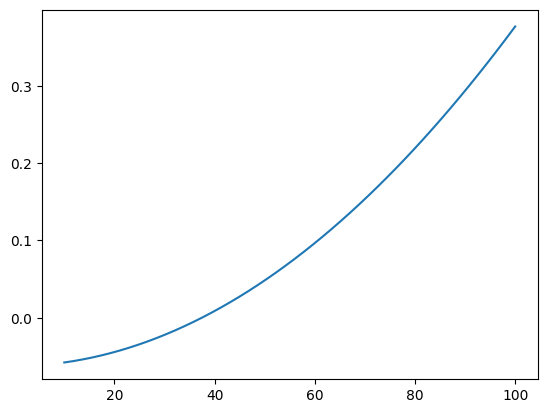

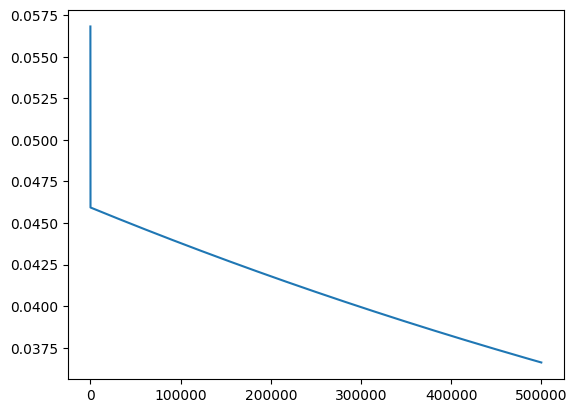

In [86]:
w = [0, 0]
b = 0
LR = 0.000001
EPOCHES = 500000

losses = []

for epoch in range (EPOCHES) :
    w, b = update (x, y_normal, w, b, LR)
    pred = model_2 (x, w, b)
    loss = CostFunc (pred, y_normal)
    losses.append (loss)
    
test_x2 = np.linspace (10, 100, 50)
test_y2 = model_2 (test_x2, w, b)
plt.plot (test_x2, test_y2)
plt.show ()

plt.plot (range (EPOCHES), losses)
plt.show ()

## 03 Regularization

The regularization is another commen method to deal with the overfitting.